In [8]:
import os
import osmnx as ox
import pandas as pd
import pyautogui
import time
import pandas as pd
import subprocess

In [3]:
# 获取特定地区，特定属性地块的经纬度
proxies = {
    'http': 'http://127.0.0.1:7890',
    'https': 'http://127.0.0.1:7890',
}

def get_features_locations(place, tags):
    
    ox.config(use_cache=True, log_console=True, requests_kwargs={"proxies": proxies})
    # Retrieve features from OpenStreetMap
    gdf = ox.features_from_place(place, tags=tags)
    
    if not gdf.empty:
        # Extract the points' coordinates
        locations = []
        for idx, row in gdf.iterrows():
            if row.geometry.geom_type == 'Point':
                locations.append((row.geometry.y, row.geometry.x))
            elif row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                centroid = row.geometry.centroid
                locations.append((centroid.y, centroid.x))

        # Create a DataFrame
        return pd.DataFrame(locations, columns=['Latitude', 'Longitude'])
    else:
        return pd.DataFrame(columns=['Latitude', 'Longitude'])

# Example usage
place = "Wuhan, China"  # The area to search
tags = {"natural": "wood"}  # OSM tags to filter elements
output_directory = r'C:\Users\cuiy\Desktop\locationImg'  # Update this path to your desired directory
output_filename = 'targets_locations.csv'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Fetch locations
locations_df = get_features_locations(place, tags)
if not locations_df.empty:
    print(f"Found {len(locations_df)} targets in {place}.")
    print(locations_df.head())  # Print first few locations

    # Full path for the output file
    full_output_path = os.path.join(output_directory, output_filename)

    # Save to CSV
    locations_df.to_csv(full_output_path, index=False)
    print(f"Locations saved to '{full_output_path}'.")
else:
    print(f"No features found in {place}.")

C:\Users\cuiy\AppData\Local\Temp\ipykernel_2200\1982089770.py:8: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True, requests_kwargs={"proxies": proxies})


Found 688 targets in Wuhan, China.
    Latitude   Longitude
0  30.146826  114.344098
1  30.240155  114.454859
2  30.260935  114.448914
3  30.261555  114.439659
4  30.250841  114.447267
Locations saved to 'C:\Users\cuiy\Desktop\locationImg\targets_locations.csv'.


In [ ]:
##### 要启动的exe文件路径(此脚本不好用)
exe_path = r'C:\Program Files\Google\Google Earth Pro\client\googleearth.exe'
coordinates = pd.read_csv(r'C:\Users\cuiy\Desktop\locationImg\targets_locations.csv')

# 启动exe程序
process = subprocess.Popen(exe_path)

# 等待程序启动，这里等待时间可能需要根据实际情况调整
time.sleep(5)

# 发送Alt+Space来打开系统菜单
pyautogui.hotkey('alt', 'space')

# 有些程序可能需要稍微延迟发送'x'以确保系统菜单已经打开
time.sleep(1)

# 发送'x'键以最大化窗口
pyautogui.press('x')
time.sleep(2)

pyautogui.hotkey('ctrl', 'alt', 's')
time.sleep(10)  # 等待对话框打开

pyautogui.click(x=1500, y=815)   
time.sleep(0.5)

pyautogui.click(x=550, y=100)   #地图选项
time.sleep(0.5)

pyautogui.click(x=540, y=170)   #标题和说明
time.sleep(0.5)

pyautogui.click(x=500, y=210)   #图例
time.sleep(0.5)

pyautogui.click(x=500, y=240)   #比例
time.sleep(0.5)

pyautogui.click(x=500, y=270)   #罗盘
time.sleep(0.5)

pyautogui.click(x=650, y=360)   #logo比例
time.sleep(0.5)
pyautogui.hotkey('ctrl', 'a')
time.sleep(0.5)
pyautogui.typewrite(str(1))
time.sleep(0.5)

pyautogui.click(x=800, y=100)   #地图选项
time.sleep(0.5)

pyautogui.click(x=800, y=225)  #1080p
time.sleep(0.5)

for index, row in coordinates.iterrows():
    if index>130:
        break
    pyautogui.click(x=100, y=100)  #位置搜索框
    time.sleep(0.5)
    pyautogui.hotkey('ctrl', 'a')
    time.sleep(0.5)
    pyautogui.typewrite(str(row['Latitude']) + ',' + str(row['Longitude']))
    pyautogui.press('enter')
    time.sleep(10)
    #放大
    pyautogui.click(x=1500, y=800) #屏幕中间
    time.sleep(0.5)
    for i in range(7):
        pyautogui.scroll(10)
        time.sleep(0.5)
    pyautogui.hotkey( 'alt', 'v')
    time.sleep(0.5)
    pyautogui.click(x=400, y=505)  #重置
    time.sleep(0.5)
    pyautogui.click(x=750, y=505)  #重置倾斜
    time.sleep(0.5)
    pyautogui.click(x=20, y=190)  #取消显示坐标点
    time.sleep(0.5)
    pyautogui.click(x=1050, y=100)  #保存按钮
    time.sleep(0.5)

    pyautogui.click(x=800, y=755)  #文件名输入框
    time.sleep(0.5)
    pyautogui.hotkey('ctrl', 'a')
    time.sleep(0.5)

    pyautogui.typewrite(str(index+1)+f'_{row["Latitude"]}_{row["Longitude"]}')
    pyautogui.press('enter')
    time.sleep(5)

In [9]:
import ee
# 设置代理环境变量
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'
ee.Authenticate()
ee.Initialize(project='ee-xiaoyangcui9')
print(ee.String('Hello from the Earth Engine servers!').getInfo())

Hello from the Earth Engine servers!


In [9]:
import ee
import geemap

# 初始化 Earth Engine
ee.Initialize()

# 定义区域（例如一个点和缓冲区）
point = ee.Geometry.Point([-74.044502, 40.689247])
buffer = point.buffer(1000)  # 以米为单位的缓冲区

# 获取 Sentinel-2 数据集并按日期过滤
image = ee.ImageCollection('COPERNICUS/S2').filterBounds(buffer).filterDate('2024-01-01', '2024-01-31').median()

# 裁剪到缓冲区
clipped_image = image.clip(buffer)

# 可视化参数
vis_params = {'min': 0, 'max': 3000, 'bands': ['B4', 'B3', 'B2']}

# 保存图像
geemap.ee_export_image(clipped_image, filename='high_res_image.tif', scale=10, region=buffer, file_per_band=False)


Generating URL ...
Please wait ...
Data downloaded to E:\Jupyter\high_res_image.tif


In [6]:
# Rasterio：用于读取和写入地理空间栅格数据的库。
import rasterio
from rasterio.plot import show

# 打开 GeoTIFF 文件
with rasterio.open('E:\\Jupyter\\test.tif') as src:
    # 显示图像
    show(src)

RasterioIOError: high_res_image.tif: No such file or directory

In [26]:
import ee

# 初始化Google Earth Engine
ee.Initialize()

# 定义感兴趣区域 (ROI)
roi = ee.Geometry.Polygon(
        [[[121.78293499072241, 31.112861181202753],
          [121.85881025875673, 31.121385052374205],
          [121.8330607338203, 31.164874264847942],
          [121.77177686231492, 31.15312239052539]]]);

# 加载Landsat 8图像集合
image_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterDate("2023-10-01", "2024-7-31") \
    .filterBounds(roi) \
    .sort("CLOUD_COVER")

# 选择云量最少的一张图像
image = image_collection.first()

# 定义可视化参数
vis_params = {'bands': ["SR_B4", "SR_B3", "SR_B2"], 'min': 5000, 'max': 15000}

image = image.select(["SR_B4", "SR_B3", "SR_B2"])
# 导出图像到Google Drive
task = ee.batch.Export.image.toDrive(**{
    'image': image,
    'description': 'testPy',
    'scale': 30,
    'region': roi,
    'maxPixels': 1e13
})

task.start()

(1126, 1423, 3)


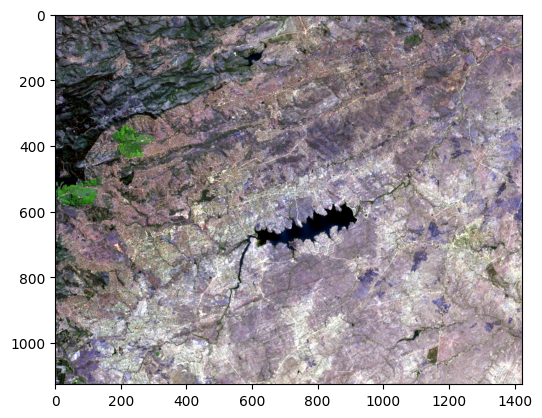

In [28]:
%matplotlib inline
import tifffile as tiff
import numpy as np 
import matplotlib.pyplot as plt
tiff_path = 'E:\\Jupyter\\test2.tif'
 
def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix
 
img = tiff.imread(tiff_path)
print(img.shape)
plt.imshow(scale_percentile(img[:,:,:3]))

In [2]:
# 爬取谷歌遥感瓦片

In [17]:
import urllib.request  # 下载

import os
import cv2
import numpy as np
import random
import re
import math
from tqdm import tqdm

'''
    度分秒（DMS）坐标转换为小数度（DD）坐标:Decimal Degrees = Degrees + (Minutes/60) + (Seconds/3600)
    南纬或西经则为负数
'''


def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes) / 60 + float(seconds) / (60 * 60)
    if direction == 'W' or direction == 'S':  # 南纬或西经则为负数
        dd *= -1
    return dd


def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    return (lat)


count = 0  # 用于getimg异常次数过多退出计数

agents = [
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.101 Safari/537.36',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/532.5 (KHTML, like Gecko) Chrome/4.0.249.0 Safari/532.5',
    'Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US) AppleWebKit/532.9 (KHTML, like Gecko) Chrome/5.0.310.0 Safari/532.9',
    'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.7 (KHTML, like Gecko) Chrome/7.0.514.0 Safari/534.7',
    'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.601.0 Safari/534.14',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.601.0 Safari/534.14',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.27 (KHTML, like Gecko) Chrome/12.0.712.0 Safari/534.27',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.1 (KHTML, like Gecko) Chrome/13.0.782.24 Safari/535.1']


def deg2num(lat_deg, lon_deg, zoom):
    """经纬度反算切片行列号 3857坐标系（将经纬度转换为瓦片坐标 (x, y)）"""
    lat_rad = math.radians(lat_deg)  # 将纬度从度数转换为弧度
    n = 2.0 ** zoom  # 是缩放级别下的系数，表示地图被分割成的瓦片数的边长（整张地图一行的瓦片数）
    '''经度 lon_deg 加上 180，使其范围从 [-180, 180] 转换为 [0, 360]。
    将其除以 360，表示该经度相对于世界的比例位置。
    乘以 n，即缩放级别下瓦片总数，得到实际的瓦片 x 坐标。
    使用 int() 将结果转换为整数，因为瓦片坐标必须是整数。'''
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)  # Web Mercator 投影
    return (xtile, ytile)


# 下载图片
def getimg(Tpath, Spath, x, y):
    global count
    count = 0  # 清零
    try:
        f = open(Spath, 'wb')
        req = urllib.request.Request(Tpath)
        req.add_header('User-Agent', random.choice(agents))  # 换用随机的请求头
        pic = urllib.request.urlopen(req, timeout=60)
        f.write(pic.read())
        f.close()
        # print(str(x) + '_' + str(y) + '下载成功')
    except Exception as e:
        print(str(x) + '_' + str(y) + '下载失败,重试')  # 存在一直失败不跳出的bug
        print("发生错误：", e)
        getimg(Tpath, Spath, x, y)
        count = count + 1
        if count > 5:  # 5次失败就放弃
            print('失败次数过多...')
            return


# 已存在图片则不下载。（纬度，经度）
def download(zoom, LTlat, LTlon, RBlat, RBlon, rootDir):
    # 左上：lat纬度大，lon经度小
    lefttop = deg2num(LTlat, LTlon, zoom)
    rightbottom = deg2num(RBlat, RBlon, zoom)

    print("lefttop={}, rightbottom={}".format(lefttop, rightbottom))
    print("共{:d}张图像".format((lefttop[0] - rightbottom[0]) * (lefttop[1] - rightbottom[1])))

    for x in range(lefttop[0], rightbottom[0]):

        path = rootDir + str(zoom) + "\\" + str(x)  # 文件夹检查
        # x代表一行，会创建一个文件夹，存储这一行的所有y对应的图片
        if not os.path.exists(path):
            os.makedirs(path)
        # 进度条
        with tqdm(range(lefttop[1], rightbottom[1])) as pbar:
            for y in pbar:
                # Schedule 2/10
                pbar.set_description(f"Schedule {x - lefttop[0] + 1}/{rightbottom[0] - lefttop[0]}")
                '''
                    http://gac-geo.googlecnapps.cn此地址已失效；
                    使用下面的地址，或者类似 http://mt2.google.com/vt/lyrs=s&src=app&x=854719&y=454919&z=20均可。
                    记得手动设置vpn，否则python会报错ProxyError
                    参数1：lyrs=s&x={x}&y={y}&z={z}含义：lyrs卫星图无注记
                    参数2：lyrs=y&hl=zh-CN&gl=cn&x={x}&y={y}&z={z}：lyrs卫星图有注记，hl为中文
                    含义：x,y为经纬度转化的瓦片坐标，z为缩放级别（最大20）
                         gl 参数决定了卫星图是否会偏移，访问国际版的谷歌地图，获取瓦片时不加 gl 参数就好了。'''
                tilepath = "https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=" + str(x) + "&y=" + str(
                    y) + "&z=" + str(zoom)
                print("getimg path:", tilepath)
                filepath = path + "\\" + str(y) + ".png"  # 文件检查
                # 检查该路径下是否已经存在文件，如果不存在，则调用 getimg 函数下载瓦片并保存为 .png 文件。
                if not os.path.isfile(filepath):
                    getimg(tilepath, os.path.join(path, str(y) + ".png"), x, y)

    print('地图下载完成')


def merge(x1, y1, x2, y2, z, path):
    """
      作用：将一组按网格排列的图片合并成一张大的图片，并将合并后的图片保存为“merge.png”
      x1, y1: 网格的左上角的坐标（起始行和起始列）。
      x2, y2: 网格的右下角的坐标（结束行和结束列）。
      z: 一个整数，代表图片的缩放级别，可能是路径中的一个文件夹名。
    """
    row_list = list()
    for i in range(x1, x2 + 1):
        # col_list 最终将包含当前行中的所有图片。
        col_list = list()
        for j in range(y1, y2 + 1):
            # 构造图片文件的路径：path\z\i\j.png，将后面的ijz赋值到前面的路径中。
            path_img = path + "\\{z}\\{i}\\{j}.png".format(i=i, j=j, z=z)
            img = cv2.imread(path_img)
            if img is not None:
                print("{}\\{}.jpg,shape为{}".format(i, j, img.shape))
            else:
                print("{}\\{}.png文件读取异常！".format(i, j))
            col_list.append(img)
        # shape: (a, b, c)+(a, b, c)=(2a, b, c)，将当前行的所有列图片垂直堆叠，形成一张长条形图片
        k = np.vstack(col_list)
        print("纵向堆叠：shape1={}* size={}, shape2={}".format(col_list[0].shape, len(col_list), k.shape))
        row_list.append(k)
    # shape: (a, b, c)+(a, b, c)=(a, 2b, c)将所有行图片水平堆叠，形成最终的大图片
    result = np.hstack(row_list)
    print("水平堆叠：shape2={}* size={}, shape3={}".format(row_list[0].shape, len(row_list), result.shape))
    file_path = path + "//merge_(" + str(x1) + "," + str(y1) + ")(" + str(x2) + "," + str(y2) + ").png"
    cv2.imwrite(file_path, result)
    print("地图合并完成，保存为：{:s}".format(file_path))


if __name__ == "__main__":
    rootDir = "C:\\Users\\cuiy\\Desktop\\locationImg\\satellite\\"
    # 瓦片地图的放大倍数
    zoom = 20
    # # 这里定义下载范围（DMS坐标系：20°37′24.0″N）
    # LT_lat = '23^09^39.9898N'  # 左上角的纬度
    # LT_lon = '113^25^56.3031E'  # 左上角的经度
    # RB_lat = '23^09^00.9898N'  # 右下角的纬度
    # RB_lon = '113^26^57.3031E'  # 右下角的经度
    #
    # # 椭球：WGS84 转墨卡托投影
    # LT_lat = parse_dms(LT_lat)
    # LT_lon = parse_dms(LT_lon)
    # RB_lat = parse_dms(RB_lat)
    # RB_lon = parse_dms(RB_lon)
    # lat,lon:41.7915945,-87.7486084
    #         41.7829649,-87.7418793
    LT_lat = 41.7915945
    LT_lon = -87.7486084
    RB_lat = 41.7829649
    RB_lon = -87.7418793

    delta_lat = LT_lat - RB_lat
    delta_lon = RB_lon - LT_lon

    if zoom > 15:
        LT_lat = LT_lat - delta_lat * 1 / 4
        LT_lon = LT_lon + delta_lon * 1 / 4
        RB_lat = RB_lat + delta_lat * 1 / 4
        RB_lon = RB_lon - delta_lon * 1 / 4
    download(zoom, LT_lat, LT_lon, RB_lat, RB_lon, rootDir)

    print("开始合并地图......")
    # 合并保存为大图
    lefttop = deg2num(LT_lat, LT_lon, zoom)
    rightbottom = deg2num(RB_lat, RB_lon, zoom)
    merge(lefttop[0], lefttop[1], rightbottom[0] - 2, rightbottom[1] - 2, zoom, rootDir)


共425张图像


Schedule 1/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 568.17it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854695&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 2/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 568.18it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854696&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 3/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 630.92it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854697&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 4/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 681.79it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854698&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 5/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 681.90it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854699&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 6/25:   0%|                                                                            | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454924&z=20


Schedule 6/25:   0%|                                                                            | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454934&z=20


Schedule 6/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 631.26it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854700&y=454935&z=20


Schedule 7/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 740.88it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854701&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 8/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 631.31it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854702&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 9/25: 100%|██████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 710.22it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854703&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 10/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454919&z=20


Schedule 10/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 709.96it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854704&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 11/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454920&z=20


Schedule 11/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 576.42it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854705&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 12/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454919&z=20


Schedule 12/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454928&z=20


Schedule 12/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 593.61it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854706&y=454935&z=20


Schedule 13/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 710.28it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854707&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 14/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454919&z=20


Schedule 14/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 710.40it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854708&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 15/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454923&z=20


Schedule 15/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454934&z=20


Schedule 15/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 741.05it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854709&y=454935&z=20


Schedule 16/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454927&z=20


Schedule 16/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 741.43it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854710&y=454935&z=20


Schedule 17/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 17/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 741.10it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854711&y=454935&z=20


Schedule 18/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 18/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 710.23it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854712&y=454935&z=20


Schedule 19/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454925&z=20


Schedule 19/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 774.89it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854713&y=454935&z=20


Schedule 20/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 20/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 852.30it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854714&y=454935&z=20


Schedule 21/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454923&z=20


Schedule 21/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454934&z=20


Schedule 21/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 741.13it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854715&y=454935&z=20


Schedule 22/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454927&z=20


Schedule 22/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 774.77it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854716&y=454935&z=20


Schedule 23/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454919&z=20


Schedule 23/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

Schedule 23/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 681.88it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454933&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854717&y=454935&z=20


Schedule 24/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454923&z=20


Schedule 24/25:   0%|                                                                           | 0/17 [00:00<?, ?it/s]

getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454930&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454931&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454932&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454933&z=20


Schedule 24/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 681.82it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454934&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854718&y=454935&z=20


Schedule 25/25: 100%|█████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 774.75it/s]


getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454919&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454920&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454921&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454922&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454923&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454924&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454925&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454926&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454927&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454928&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=854719&y=454929&z=20
getimg path: https://gac-geo.googlecnapps.club/maps/vt?lyrs=s&x=8

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 8 has 3 dimension(s)